In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [32]:
data_consulta2 = pd.read_csv('consulta2.csv')
data_consulta8 = pd.read_csv('consulta8.csv')
data_consulta11 = pd.read_csv('consulta11.csv')
data_consulta18 = pd.read_csv('consulta18.csv')
data_consulta19 = pd.read_csv('consulta19.csv')
data_consulta24 = pd.read_csv('consulta24.csv')
data_consulta26 = pd.read_csv('consulta26.csv')
data_consulta27 = pd.read_csv('consulta27.csv')
data_consulta28 = pd.read_csv('consulta28.csv')
data_consulta29 = pd.read_csv('consulta29.csv')
data_consulta31 = pd.read_csv('consulta31.csv')

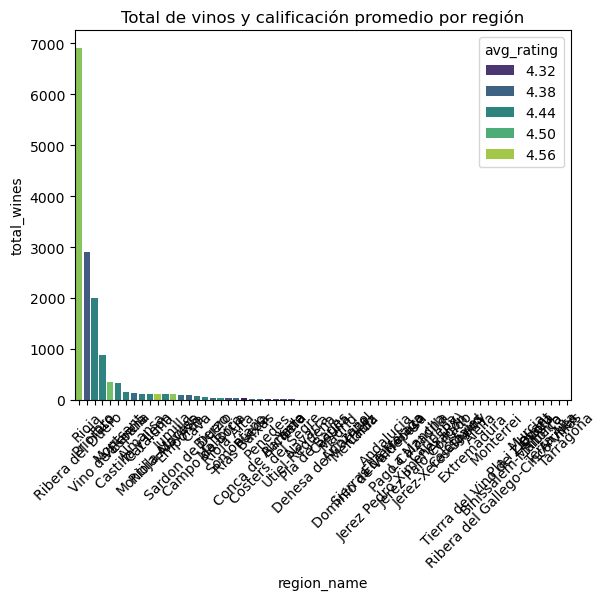

In [ ]:
# Consulta 2: Distribución regional de vinos y calificación promedio 
# Se visualizan la cantidad de vino y su calificación dependiendo de la región 

sns.barplot(data=data_consulta2, x='region_name', y='total_wines', hue='avg_rating', palette='viridis')
plt.title('Total de vinos y calificación promedio por región')
plt.xticks(rotation=45)
plt.show()

C:\Users\Gema\AppData\Local\Temp\ipykernel_15776\3417169529.py:8: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



<Figure size 1200x600 with 0 Axes>

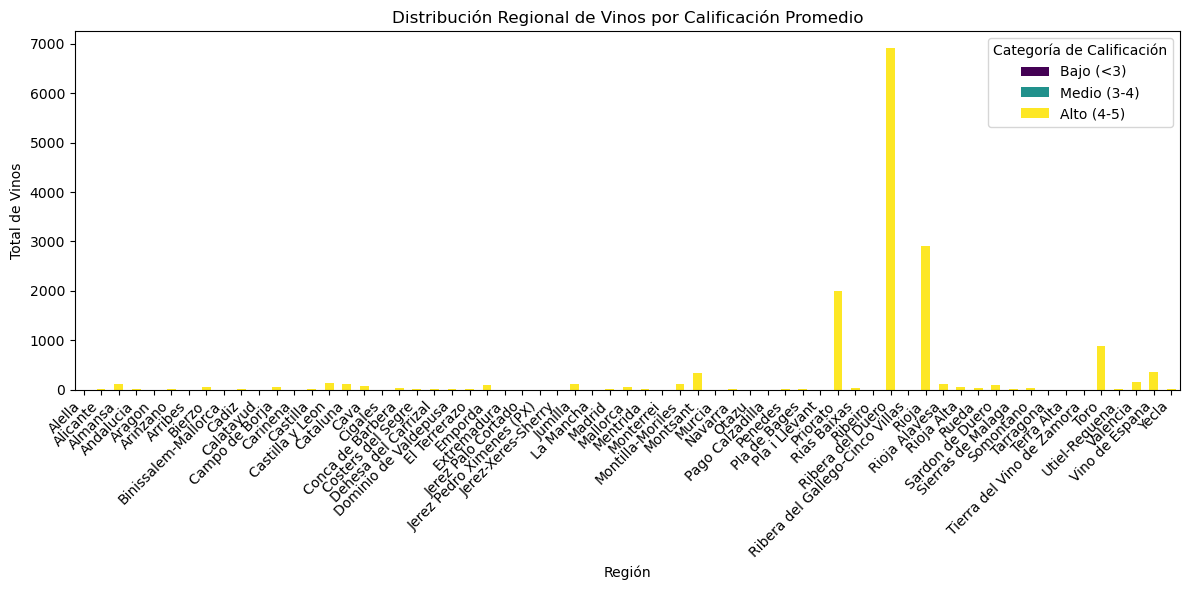

In [ ]:

bins = [0, 3, 4, 5]
labels = ['Bajo (<3)', 'Medio (3-4)', 'Alto (4-5)']
data_consulta2['rating_category'] = pd.cut(data_consulta2['avg_rating'], bins=bins, labels=labels)

# Gráfico de barras apiladas
plt.figure(figsize=(12, 6))
data_pivot = data_consulta2.pivot_table(values='total_wines', index='region_name', columns='rating_category', aggfunc='sum')
data_pivot.plot(kind='bar', stacked=True, colormap='viridis', figsize=(12, 6))

plt.title('Distribución Regional de Vinos por Calificación Promedio')
plt.ylabel('Total de Vinos')
plt.xlabel('Región')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend(title='Categoría de Calificación')
plt.show()


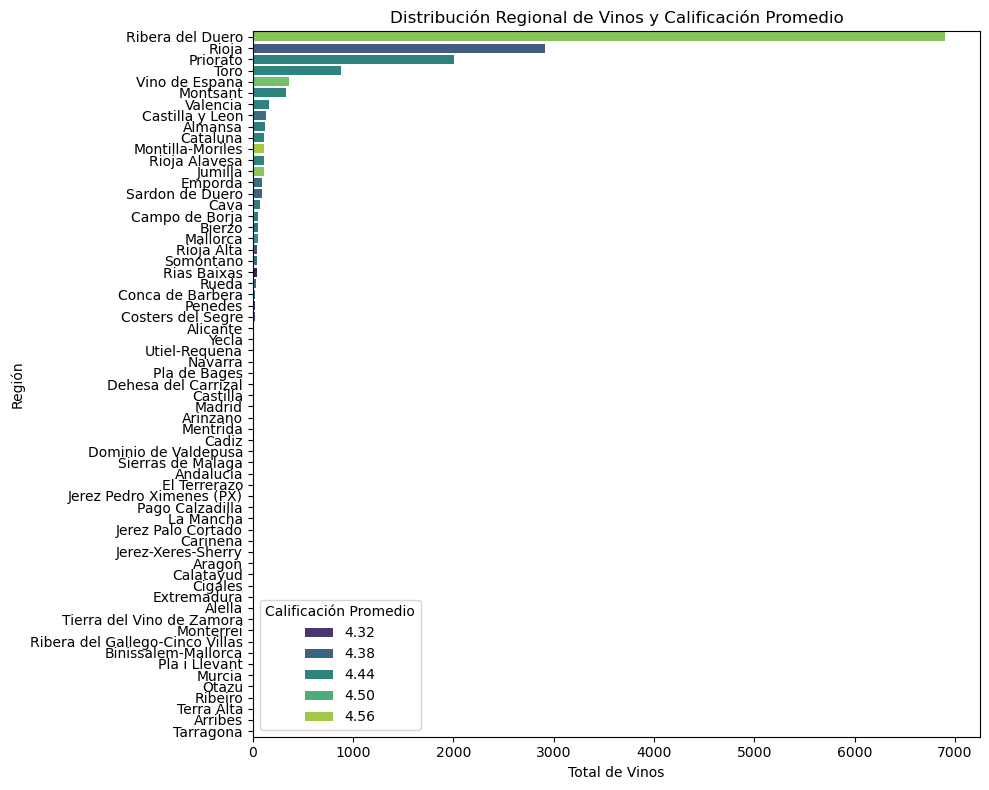

In [46]:
plt.figure(figsize=(10, 8))
sns.barplot(data=data_consulta2, x='total_wines', y='region_name', hue='avg_rating', palette='viridis')
plt.title('Distribución Regional de Vinos y Calificación Promedio')
plt.xlabel('Total de Vinos')
plt.ylabel('Región')
plt.legend(title='Calificación Promedio')
plt.tight_layout()
plt.show()

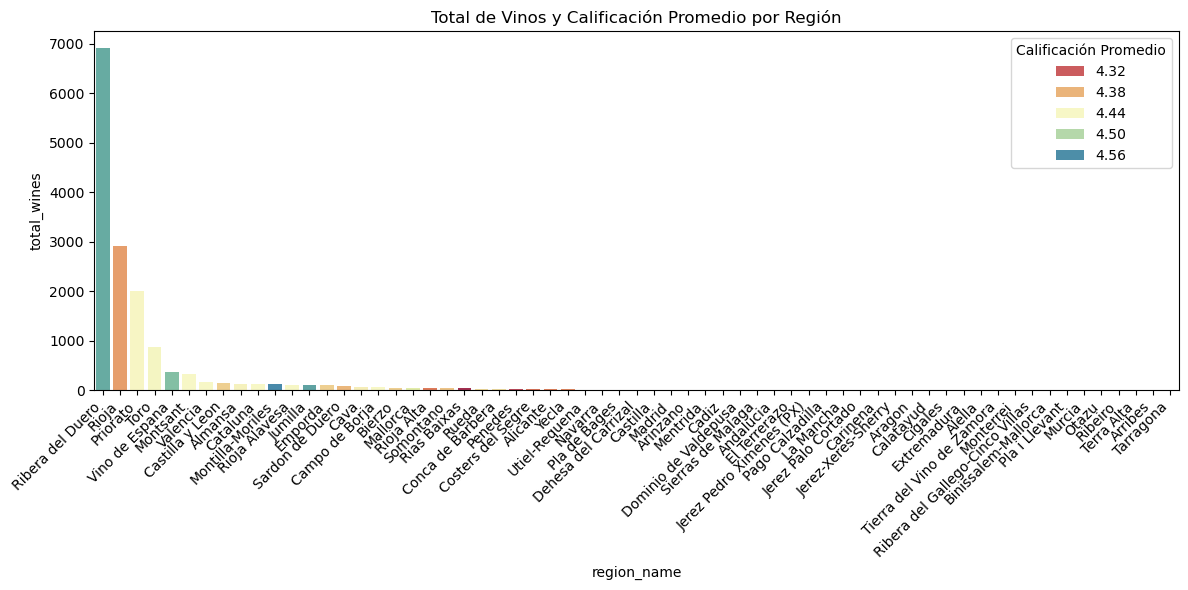

In [ ]:
palette = sns.color_palette("Spectral", as_cmap=True)

plt.figure(figsize=(12, 6))
sns.barplot(data=data_consulta2, x='region_name', y='total_wines', hue='avg_rating', palette=palette)
plt.title('Total de Vinos y Calificación Promedio por Región')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Calificación Promedio')
plt.tight_layout()
plt.show()

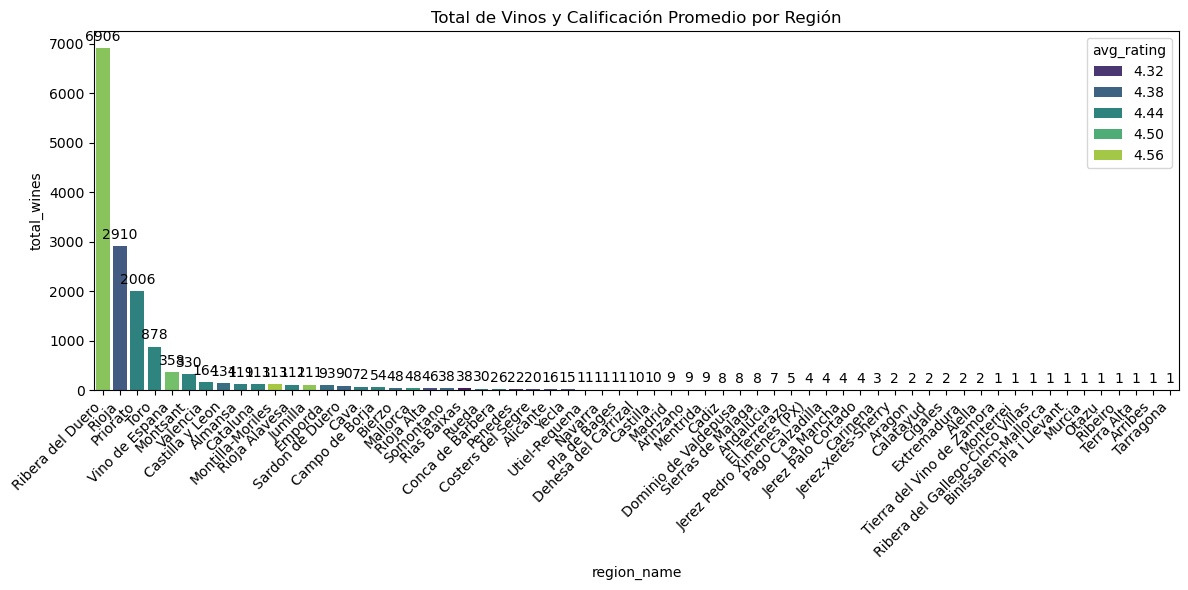

In [ ]:

plt.figure(figsize=(12, 6))
barplot = sns.barplot(data=data_consulta2, x='region_name', y='total_wines', hue='avg_rating', palette='viridis')

# Añadir etiquetas encima de las barras
for container in barplot.containers:
    barplot.bar_label(container, fmt='%.0f', label_type='edge', fontsize=10, padding=3)

plt.title('Total de Vinos y Calificación Promedio por Región')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

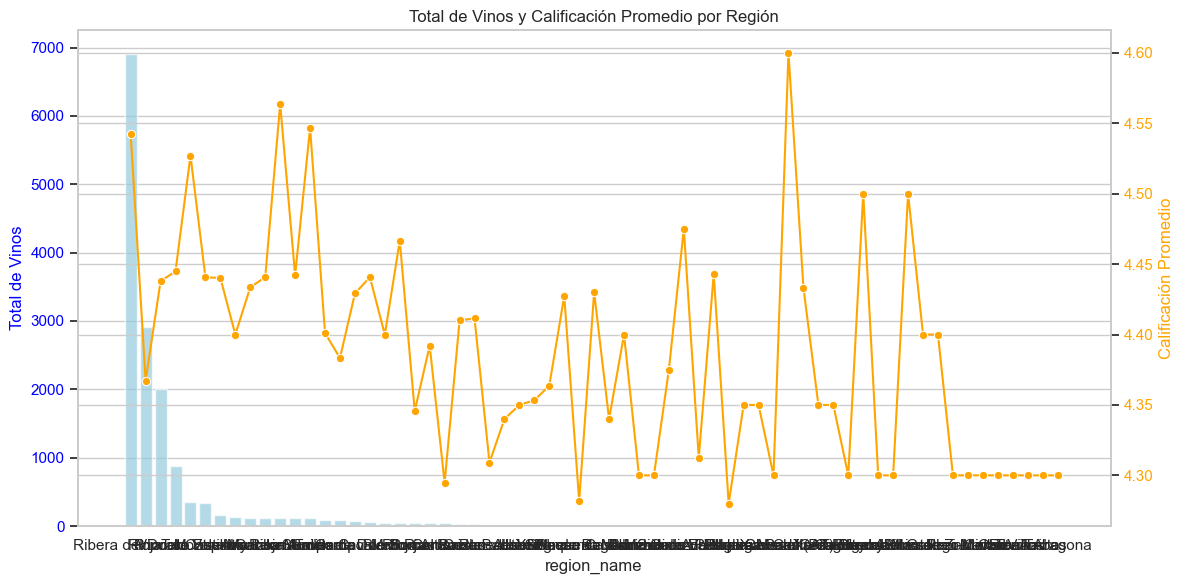

In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Barra para el total de vinos
sns.barplot(data=data_consulta2, x='region_name', y='total_wines', ax=ax1, color='skyblue', alpha=0.7)
ax1.set_ylabel('Total de Vinos', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Línea para la calificación promedio
ax2 = ax1.twinx()
sns.lineplot(data=data_consulta2, x='region_name', y='avg_rating', ax=ax2, color='orange', marker='o')
ax2.set_ylabel('Calificación Promedio', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

plt.title('Total de Vinos y Calificación Promedio por Región')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

C:\Users\Gema\AppData\Local\Temp\ipykernel_15776\4021083855.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




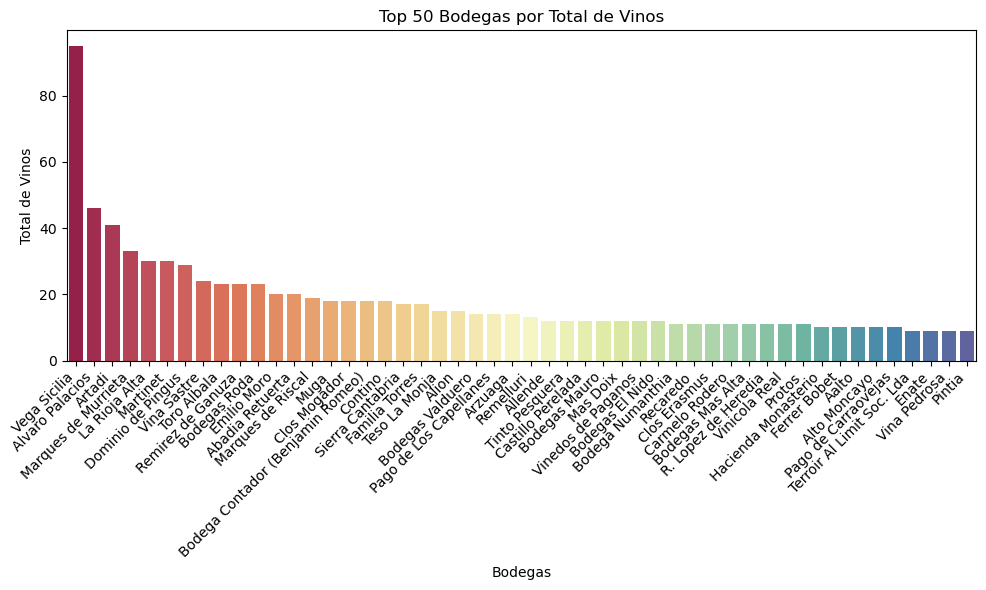

In [ ]:
# Ordenar y filtrar las 10 bodegas principales
top_wineries = data_consulta8.sort_values(by='total_wines', ascending=False).head(50)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_wineries, x='winery', y='total_wines', palette='Spectral')
plt.title('Top 50 Bodegas por Total de Vinos')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Bodegas')
plt.ylabel('Total de Vinos')
plt.tight_layout()
plt.show()

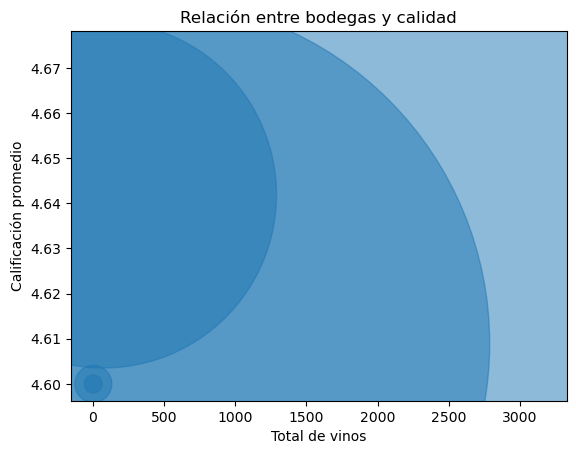

In [ ]:
# Consulta 31: Relación entre bodegas y calidad

plt.scatter(data_consulta31['total_wines'], data_consulta31['avg_rating'], s=data_consulta31['total_reviews'], alpha=0.5)
plt.xlabel('Total de vinos')
plt.ylabel('Calificación promedio')
plt.title('Relación entre bodegas y calidad')
plt.show()

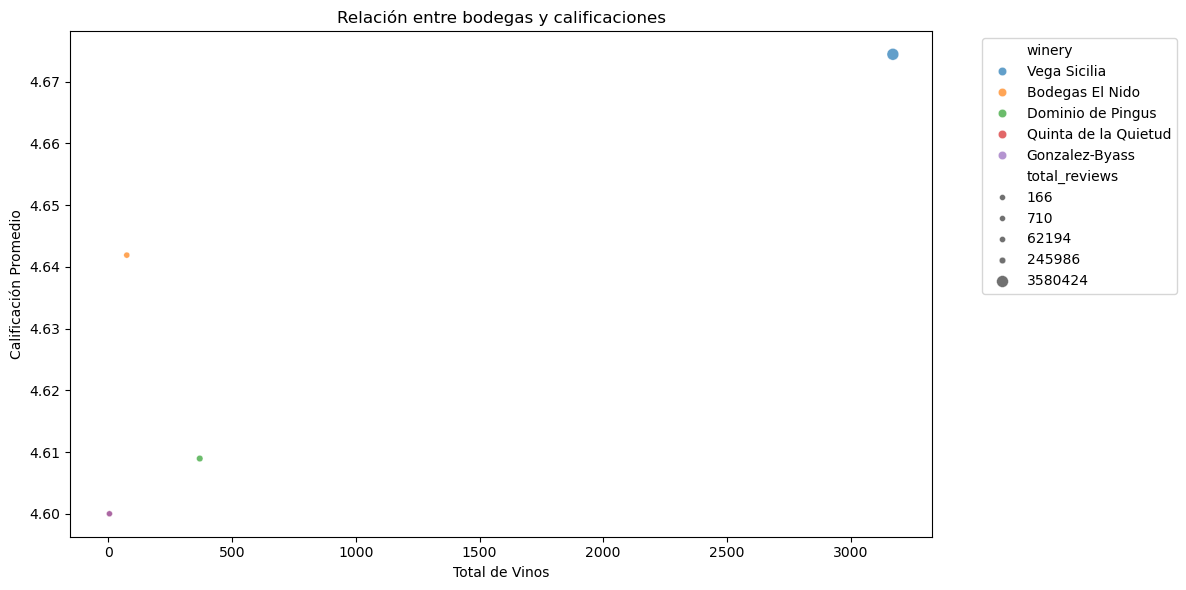

In [41]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data_consulta31, x='total_wines', y='avg_rating', size='total_reviews', 
                hue='winery', palette='tab10', alpha=0.7)
plt.title('Relación entre bodegas y calificaciones')
plt.xlabel('Total de Vinos')
plt.ylabel('Calificación Promedio')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

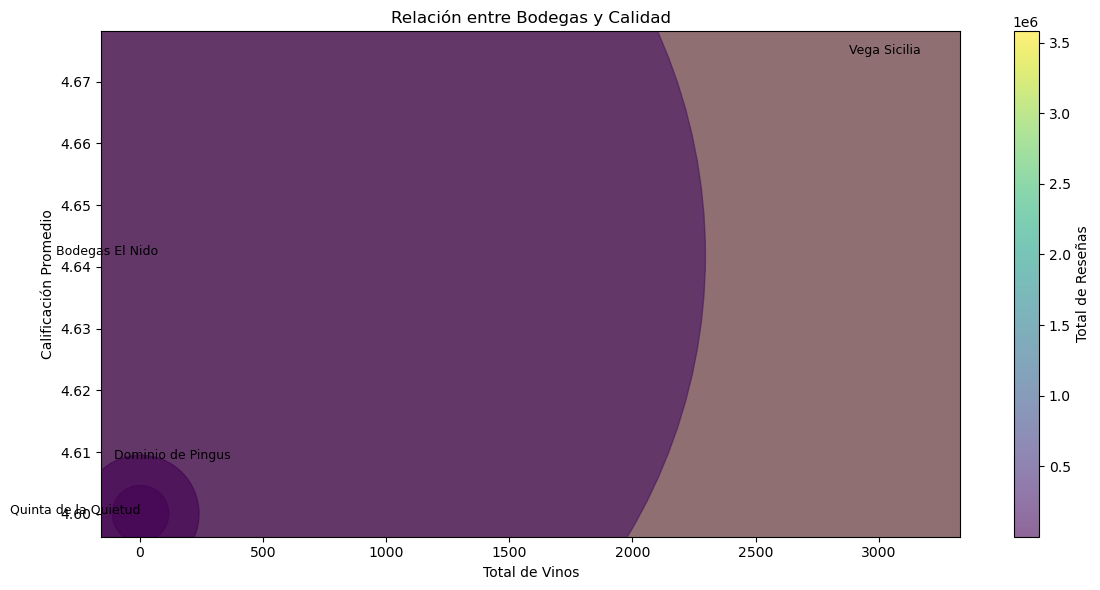

In [50]:
plt.figure(figsize=(12, 6))
scatter = plt.scatter(data_consulta31['total_wines'], 
                      data_consulta31['avg_rating'], 
                      s=data_consulta31['total_reviews'] * 10,  # Escalar tamaño de burbujas
                      alpha=0.6, 
                      c=data_consulta31['total_reviews'], 
                      cmap='viridis')

# Añadir etiquetas a los puntos más destacados
for i, row in data_consulta31.iterrows():
    if row['total_reviews'] > 500:  # Filtrar por número de reseñas (ajustar según datos)
        plt.text(row['total_wines'], row['avg_rating'], row['winery'], fontsize=9, ha='right')

plt.colorbar(scatter, label='Total de Reseñas')
plt.xlabel('Total de Vinos')
plt.ylabel('Calificación Promedio')
plt.title('Relación entre Bodegas y Calidad')
plt.tight_layout()
plt.show()

In [ ]:
fig = px.scatter(data_consulta31, 
                 x='total_wines', 
                 y='avg_rating', 
                 size='total_reviews', 
                 color='avg_rating',
                 hover_name='winery',
                 title='Relación entre Bodegas y Calidad',
                 labels={'total_wines': 'Total de Vinos', 'avg_rating': 'Calificación Promedio'},
                 color_continuous_scale='Viridis')

fig.update_layout(legend_title_text='Promedio de Calificación')
fig.show()

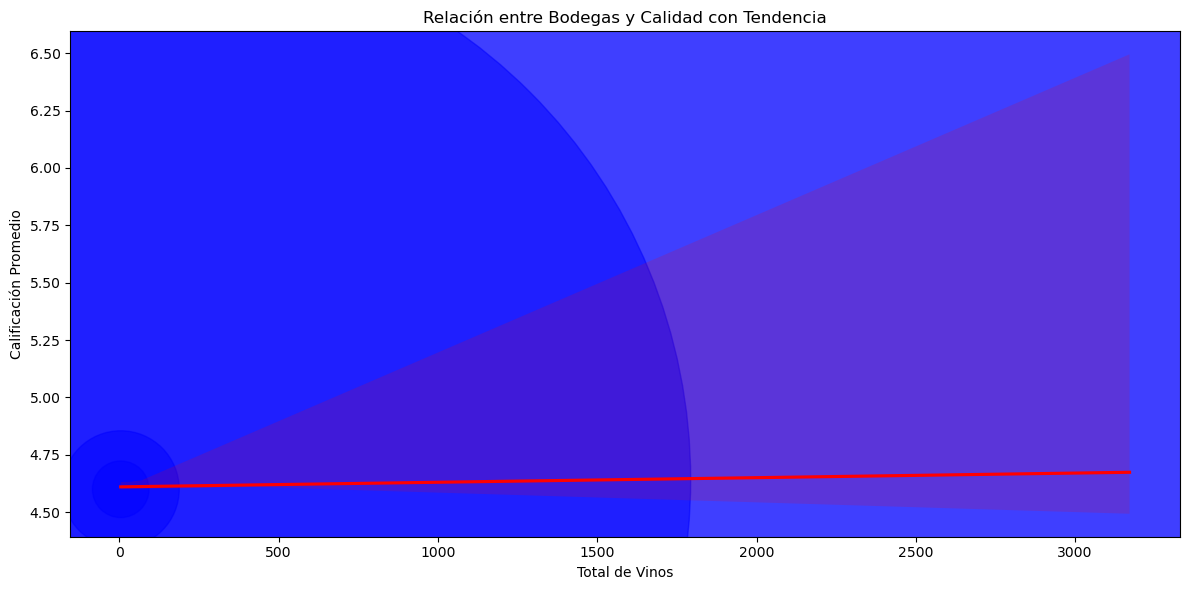

In [53]:
plt.figure(figsize=(12, 6))
sns.regplot(data=data_consulta31, 
            x='total_wines', 
            y='avg_rating', 
            scatter_kws={'s': data_consulta31['total_reviews'] * 10, 'alpha': 0.5}, 
            line_kws={'color': 'red'}, 
            color='blue')

plt.xlabel('Total de Vinos')
plt.ylabel('Calificación Promedio')
plt.title('Relación entre Bodegas y Calidad con Tendencia')
plt.tight_layout()
plt.show()

C:\Users\Gema\AppData\Local\Temp\ipykernel_15776\248448394.py:7: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\Gema\AppData\Local\Temp\ipykernel_15776\248448394.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




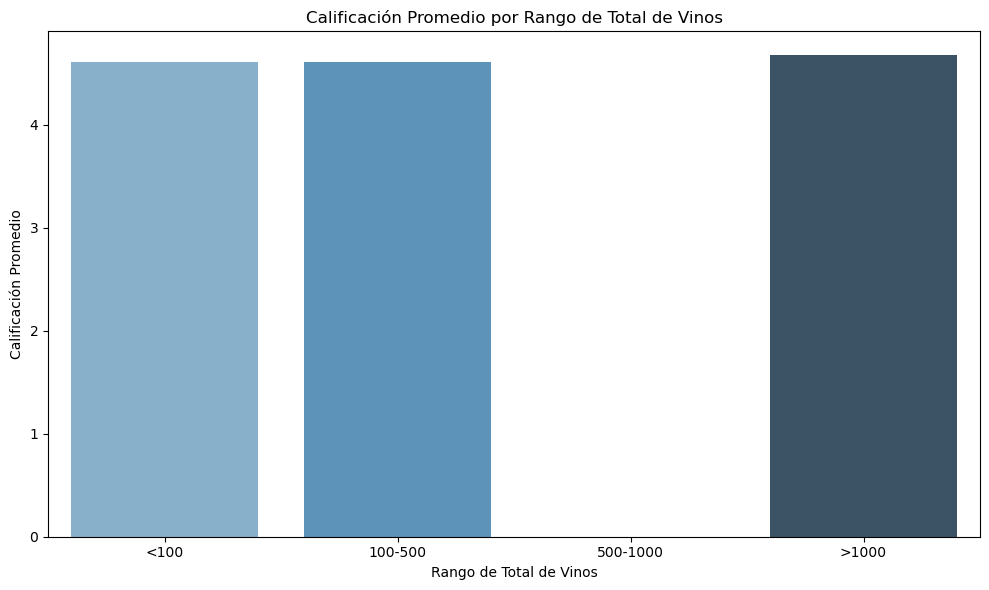

In [ ]:
# Se crean diferentes rangos para los vinos en función del total de vinos
bins = [0, 100, 500, 1000, 5000]
labels = ['<100', '100-500', '500-1000', '>1000']
data_consulta31['wine_range'] = pd.cut(data_consulta31['total_wines'], bins=bins, labels=labels)

# Se agrupan los datos 
grouped_data = data_consulta31.groupby('wine_range').agg({'avg_rating': 'mean', 'total_reviews': 'sum'}).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_data, x='wine_range', y='avg_rating', palette='Blues_d')
plt.title('Calificación Promedio por Rango de Total de Vinos')
plt.xlabel('Rango de Total de Vinos')
plt.ylabel('Calificación Promedio')
plt.tight_layout()
plt.show()

C:\Users\Gema\AppData\Local\Temp\ipykernel_15776\3610650360.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_consulta28, x='price_category', y='avg_rating', palette='pastel')


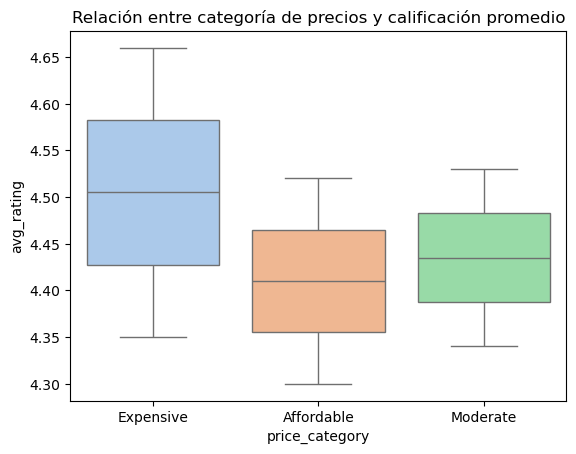

In [18]:
# Consulta 28: Relación entre categoría de precios y calificación promedio
sns.boxplot(data=data_consulta28, x='price_category', y='avg_rating', palette='pastel')
plt.title('Relación entre categoría de precios y calificación promedio')
plt.show()

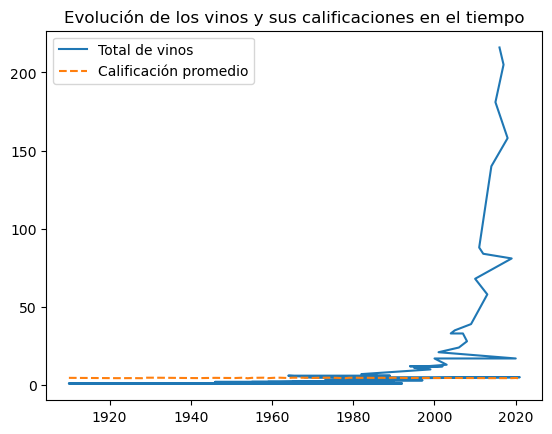

In [20]:
# Consulta 18: Evolución de los vinos y sus calificaciones en el tiempo

plt.plot(data_consulta18['wine_year'], data_consulta18['total_wines'], label='Total de vinos')
plt.plot(data_consulta26['wine_year'], data_consulta26['avg_rating'], label='Calificación promedio', linestyle='--')
plt.title('Evolución de los vinos y sus calificaciones en el tiempo')
plt.legend()
plt.show()

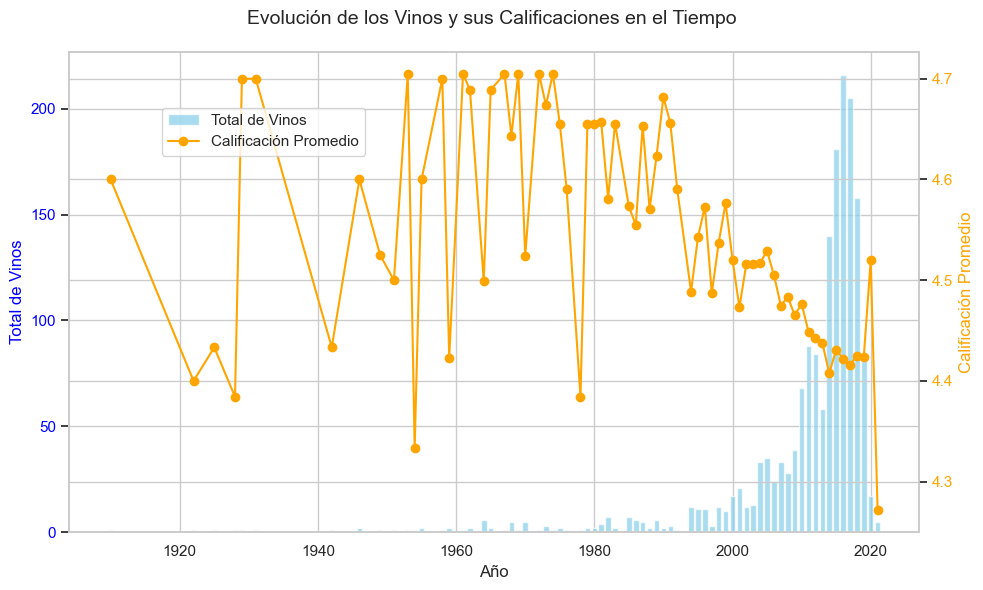

In [63]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Barras para el total de vinos
ax1.bar(data_consulta18['wine_year'], data_consulta18['total_wines'], label='Total de Vinos', color='skyblue', alpha=0.7)
ax1.set_xlabel('Año')
ax1.set_ylabel('Total de Vinos', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Línea para la calificación promedio
ax2 = ax1.twinx()
ax2.plot(data_consulta26['wine_year'], data_consulta26['avg_rating'], label='Calificación Promedio', color='orange', linestyle='-', marker='o')
ax2.set_ylabel('Calificación Promedio', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Añadir Título y Leyenda
fig.suptitle('Evolución de los Vinos y sus Calificaciones en el Tiempo', fontsize=14)
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9), bbox_transform=ax1.transAxes)
plt.tight_layout()
plt.show()


In [66]:
fig = go.Figure()

# Total de Vinos como barras
fig.add_trace(go.Bar(
    x=data_consulta18['wine_year'],
    y=data_consulta18['total_wines'],
    name='Total de Vinos',
    marker_color='skyblue'
))

# Calificación Promedio como línea
fig.add_trace(go.Scatter(
    x=data_consulta26['wine_year'],
    y=data_consulta26['avg_rating'],
    name='Calificación Promedio',
    mode='lines+markers',
    line=dict(color='orange', dash='dot')
))

fig.update_layout(
    title='Evolución de los Vinos y sus Calificaciones en el Tiempo',
    xaxis_title='Año',
    yaxis=dict(title='Total de Vinos'),
    yaxis2=dict(title='Calificación Promedio', overlaying='y', side='right'),
    legend=dict(x=0.01, y=0.99),
    template='plotly_white'
)

fig.show()

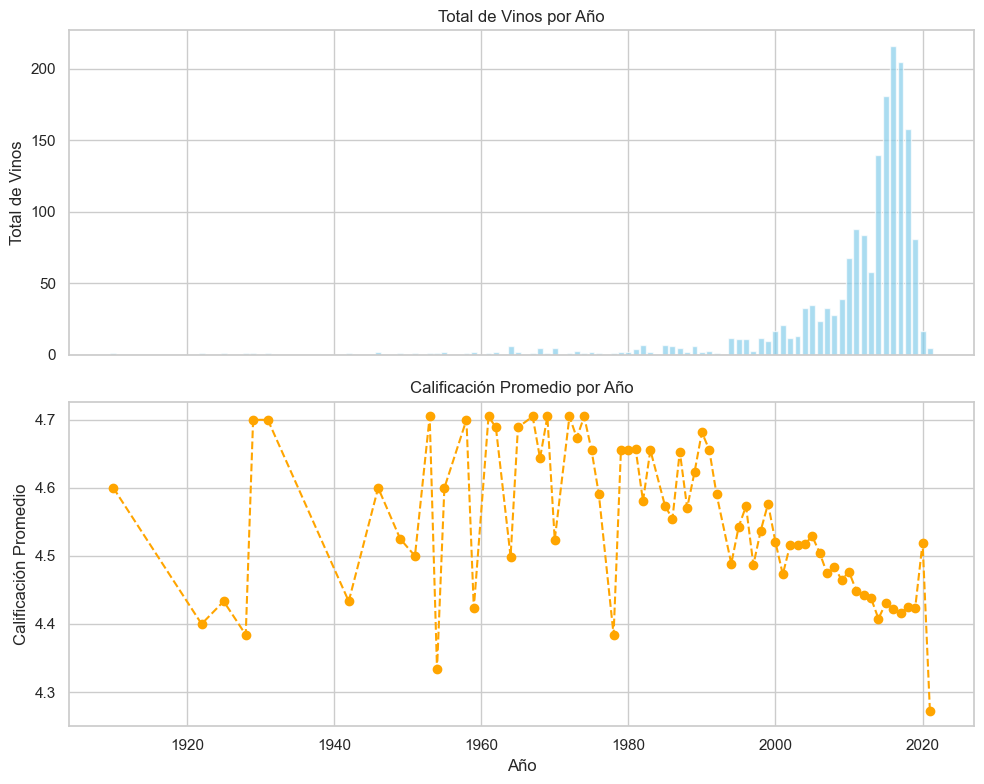

In [64]:
fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Total de vinos
axs[0].bar(data_consulta18['wine_year'], data_consulta18['total_wines'], color='skyblue', alpha=0.7)
axs[0].set_title('Total de Vinos por Año')
axs[0].set_ylabel('Total de Vinos')

# Calificación promedio
axs[1].plot(data_consulta26['wine_year'], data_consulta26['avg_rating'], color='orange', marker='o', linestyle='--')
axs[1].set_title('Calificación Promedio por Año')
axs[1].set_ylabel('Calificación Promedio')
axs[1].set_xlabel('Año')

plt.tight_layout()
plt.show()

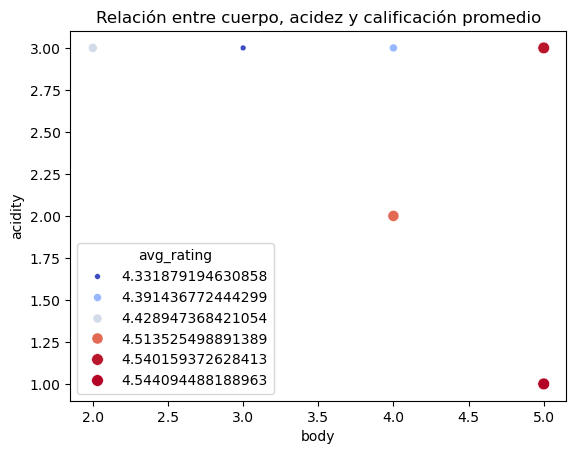

In [25]:
# Consulta 19: Relación entre cuerpo, acidez y calificación promedio

sns.scatterplot(data=data_consulta19, x='body', y='acidity', size='avg_rating', hue='avg_rating', palette='coolwarm')
plt.title('Relación entre cuerpo, acidez y calificación promedio')
plt.show()

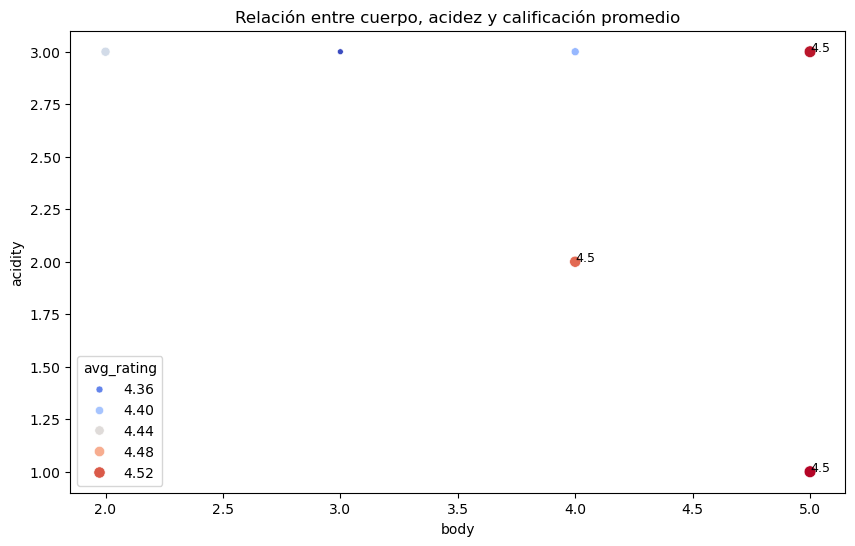

In [ ]:

plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    data=data_consulta19,
    x='body',
    y='acidity',
    size='avg_rating',
    hue='avg_rating',
    palette='coolwarm',
    legend='brief'
)

for i, row in data_consulta19.iterrows():
    if row['avg_rating'] > 4.5: 
        plt.text(
            row['body'], 
            row['acidity'], 
            f"{row['avg_rating']:.1f}", 
            color="black", 
            fontsize=9
        )

plt.title('Relación entre cuerpo, acidez y calificación promedio')
plt.show()

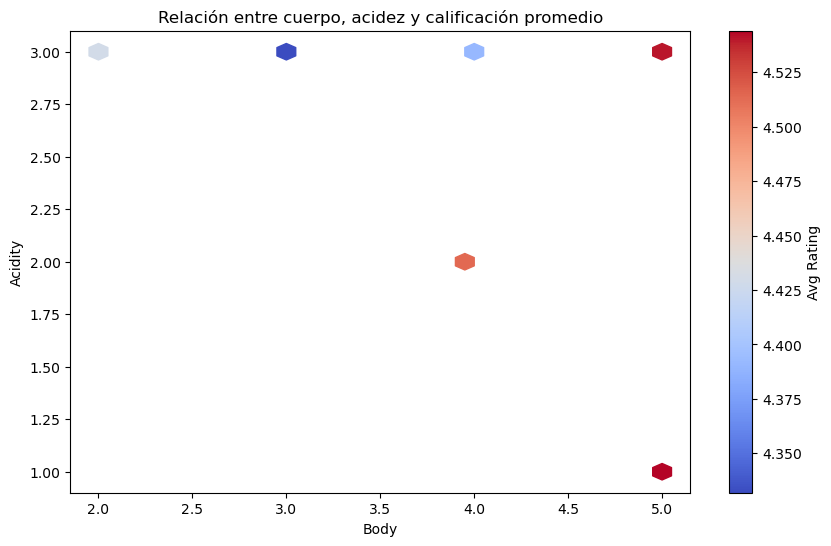

In [58]:
plt.figure(figsize=(10, 6))
plt.hexbin(data_consulta19['body'], data_consulta19['acidity'], 
           C=data_consulta19['avg_rating'], gridsize=30, cmap='coolwarm')
plt.colorbar(label='Avg Rating')
plt.xlabel('Body')
plt.ylabel('Acidity')
plt.title('Relación entre cuerpo, acidez y calificación promedio')
plt.show()

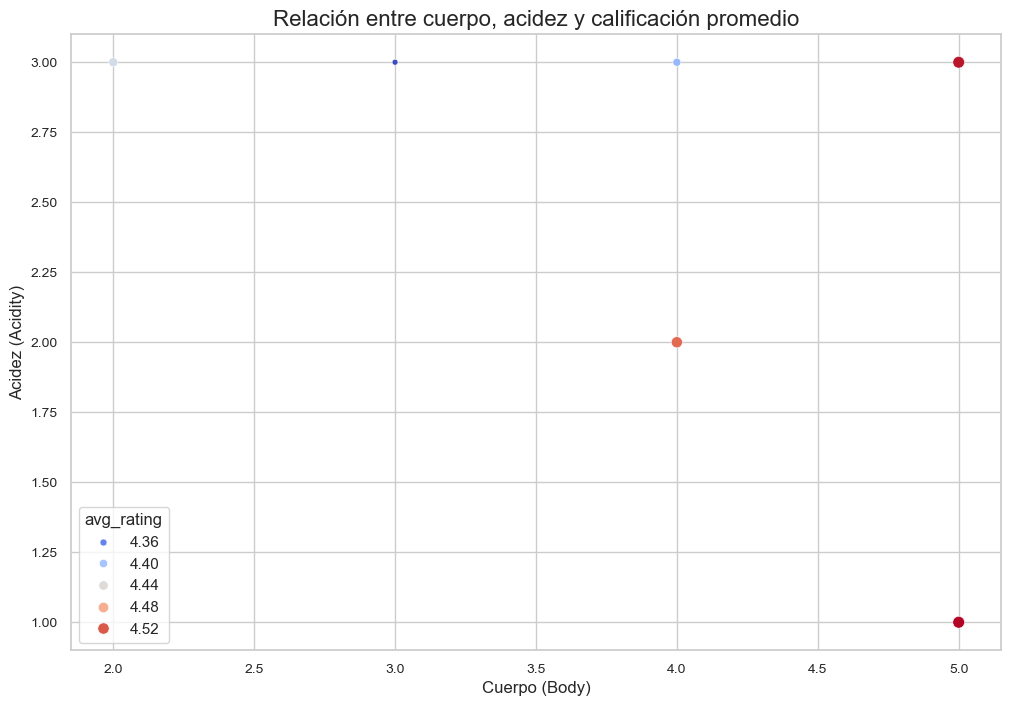

In [60]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=data_consulta19,
    x='body',
    y='acidity',
    size='avg_rating',
    hue='avg_rating',
    palette='coolwarm',
    legend='brief'
)
plt.title('Relación entre cuerpo, acidez y calificación promedio', fontsize=16)
plt.xlabel('Cuerpo (Body)', fontsize=12)
plt.ylabel('Acidez (Acidity)', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [38]:
# Consulta 19: Relación entre cuerpo, acidez y calificación promedio
# Panel interactivo 

fig = px.scatter_3d(data_consulta19, x='body', y='acidity', z='avg_rating', 
                    color='avg_rating', size='avg_rating', 
                    title='Relación entre cuerpo, acidez y calificación promedio', 
                    color_continuous_scale='Viridis')
fig.update_traces(marker=dict(opacity=0.8))
fig.show()

In [67]:
# Consulta 28: Relación entre categoría de precios y calificación promedio
# Panel interactivo 

fig = px.scatter(data_consulta28, x='price_category', y='avg_rating', size='total_wines', color='rating_category', hover_data=['avg_price'])
fig.show()

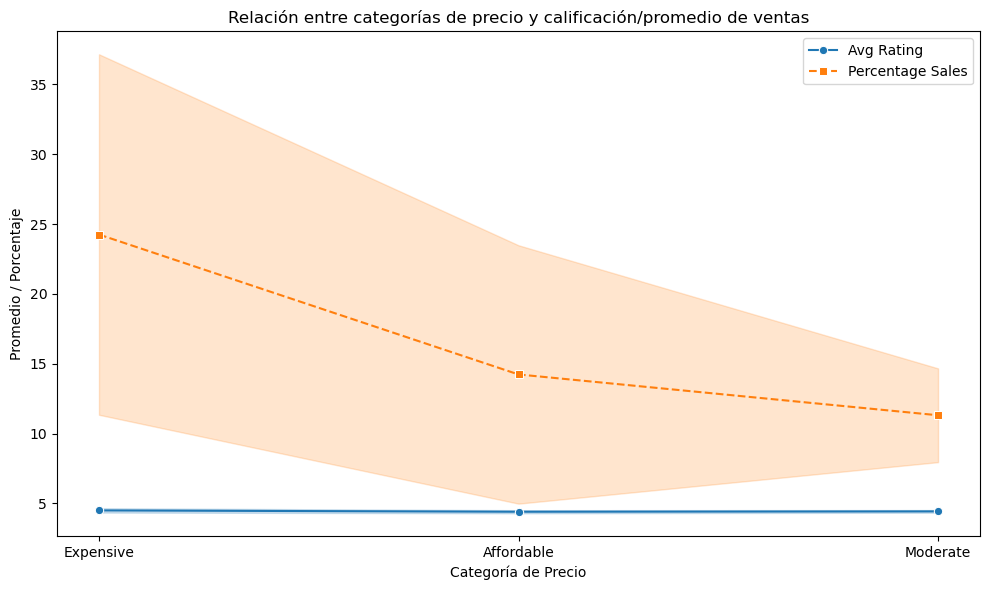

In [42]:
# Consulta 28 Relación entre categoría de precios y calificación promedio

plt.figure(figsize=(10, 6))
sns.lineplot(data=data_consulta28, x='price_category', y='avg_rating', marker='o', label='Avg Rating')
sns.lineplot(data=data_consulta28, x='price_category', y='percentage', marker='s', label='Percentage Sales', linestyle='--')
plt.title('Relación entre categorías de precio y calificación/promedio de ventas')
plt.xlabel('Categoría de Precio')
plt.ylabel('Promedio / Porcentaje')
plt.legend()
plt.tight_layout()
plt.show()

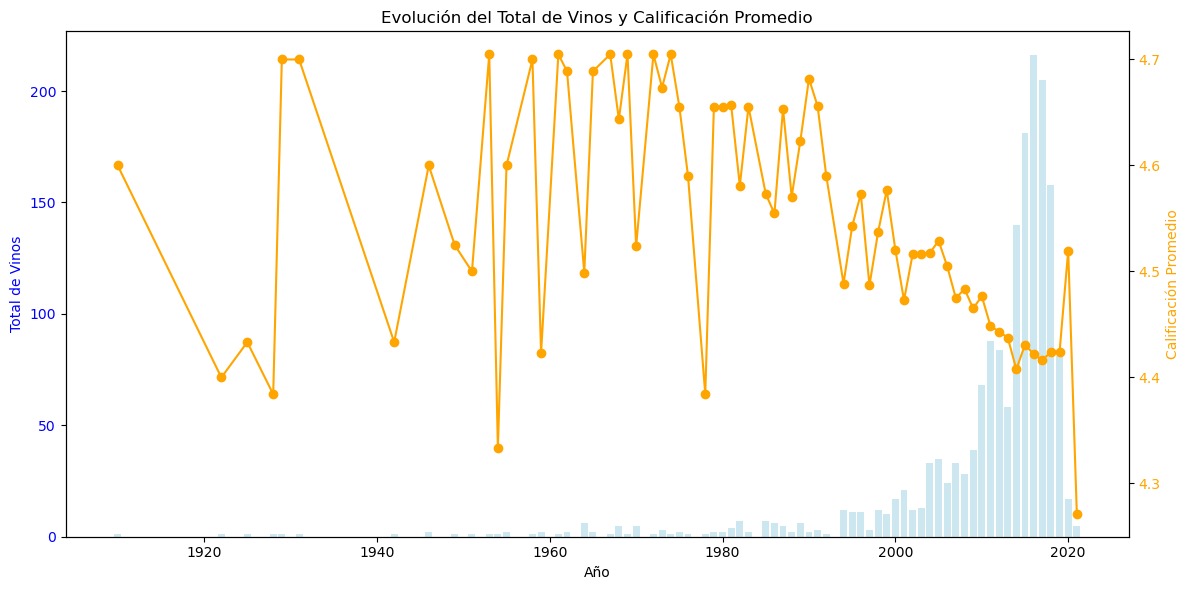

In [43]:
# Consulta 26 y 18 Relación entre calificación promedio y total de vinos

fig, ax1 = plt.subplots(figsize=(12, 6))

# Línea 1: Total de vinos
ax1.bar(data_consulta18['wine_year'], data_consulta18['total_wines'], color='lightblue', alpha=0.6, label='Total de Vinos')
ax1.set_xlabel('Año')
ax1.set_ylabel('Total de Vinos', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Línea 2: Calificación promedio
ax2 = ax1.twinx()
ax2.plot(data_consulta26['wine_year'], data_consulta26['avg_rating'], color='orange', label='Avg Rating', marker='o')
ax2.set_ylabel('Calificación Promedio', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Título y leyenda
plt.title('Evolución del Total de Vinos y Calificación Promedio')
fig.tight_layout()
plt.show()

C:\Users\Gema\AppData\Local\Temp\ipykernel_15776\1524979297.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




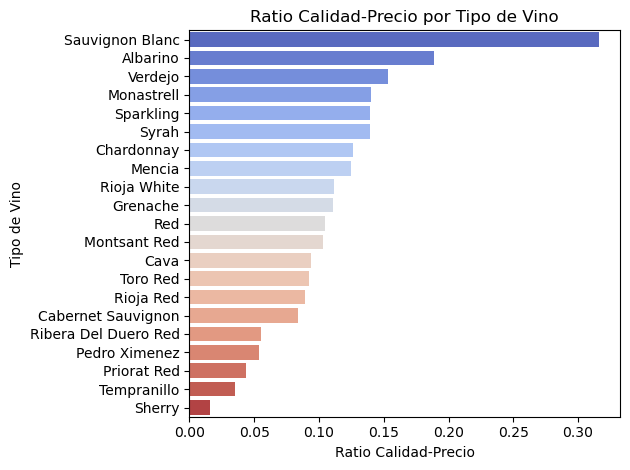

In [44]:
# Consulta 29 Relación entre calificación promedio y total de vinos

data_sorted = data_consulta29.sort_values(by='avg_quality_price_ratio', ascending=False)
sns.barplot(data=data_sorted, x='avg_quality_price_ratio', y='wine_type', palette='coolwarm')
plt.title('Ratio Calidad-Precio por Tipo de Vino')
plt.xlabel('Ratio Calidad-Precio')
plt.ylabel('Tipo de Vino')
plt.tight_layout()
plt.show()

In [68]:
fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=['Bajo', 'Medio', 'Alto', 'Baja', 'Media', 'Alta'],
        color=['#FFA07A', '#FFD700', '#8FBC8F', '#FF6347', '#FFA500', '#90EE90']
    ),
    link=dict(
        source=[0, 1, 2, 0, 1, 2],
        target=[3, 4, 5, 4, 5, 3],
        value=[data_consulta28[data_consulta28['price_category'] == 'low']['total_wines'].sum(),
               data_consulta28[data_consulta28['price_category'] == 'medium']['total_wines'].sum(),
               data_consulta28[data_consulta28['price_category'] == 'high']['total_wines'].sum(),
               50, 70, 30]  # Cambiar por valores reales si están disponibles
    )
))

fig.update_layout(title_text="Relación entre Categorías de Precio y Calificación", font_size=10)
fig.show()

In [ ]:
merged_data = pd.merge(data_consulta2, data_consulta27, how='inner', on='region')  # Ejemplo
sns.pairplot(merged_data, vars=['avg_rating', 'total_wines', 'price'], hue='region_name', palette='coolwarm')
plt.suptitle('Relaciones entre Variables Clave', y=1.02)
plt.show()

KeyError: 'country'